In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
image=cv2.imread('Jamie_Before.jpg',cv2.IMREAD_UNCHANGED)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
glass=cv2.imread('glasses.png',cv2.IMREAD_UNCHANGED)

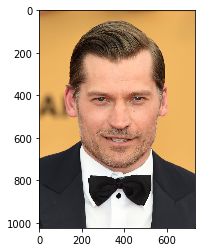

In [86]:
plt.imshow(image)

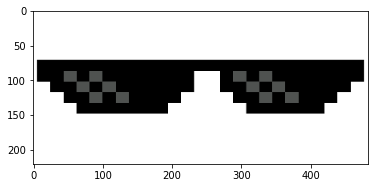

In [87]:
plt.imshow(glass)

In [66]:
eye_cascade=cv2.CascadeClassifier('frontalEyes35x16.xml')

In [67]:
def detect_eyes(image,glass):
    eyes=eye_cascade.detectMultiScale(image,1.3,5)
    ex,ey,ew,eh=eyes[0]
    glass=cv2.resize(glass,(ew,eh))
    for i in range(glass.shape[0]):
        for j in range(glass.shape[1]):
            if glass[i,j][3]!=0:
                image[ey+i,ex+j,:]=glass[i,j,:3]
    
    return image

In [68]:
new_update=detect_eyes(image,glass)

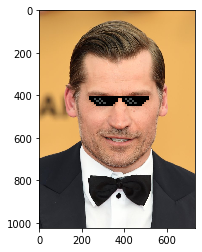

In [69]:
plt.imshow(new_update)

In [70]:
new_update.shape

(1024, 733, 3)

In [71]:
image.shape

(1024, 733, 3)

In [72]:
nose_cascade=cv2.CascadeClassifier('Nose18x15.xml')

In [73]:
# cap=cv2.VideoCapture(0)
# while True:
#     ret,frame=cap.read()
#     if ret ==False:
#         continue
#     nose=nose_cascade.detectMultiScale(frame,1.3,5)
#     print(nose)
#     for nx,ny,nw,nh in nose:
#         cv2.rectangle(frame,(nx+nw,ny+nh),(nx+nw+nw,ny+nh+nh),(255,0,0),2)
#     cv2.imshow('Frame',frame)
    
#     key_passed=cv2.waitKey(1) & 0xFF
#     if key_passed==ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

(320, 640, 4)


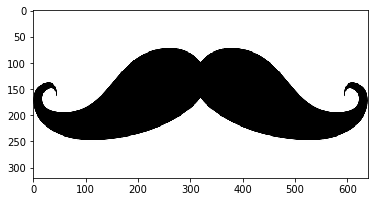

In [90]:
mustache=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
plt.imshow(mustache)
print(mustache.shape)

In [91]:
def detect_nose(image,filter_image):
    nose=nose_cascade.detectMultiScale(image,1.3,5)
    x,y,w,h=nose[0]
    filter_image=cv2.resize(filter_image,(w,h))
    for i in range(filter_image.shape[0]):
        for j in range(filter_image.shape[1]):
            if filter_image[i,j][3]!=0:
                image[y+int(h/2.0)+i,x+j]=filter_image[i,j,:3]
    return image

In [92]:
final=detect_nose(new_update,mustache)

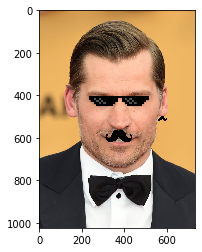

In [93]:
plt.imshow(final)

In [78]:
final.shape # RGB Format

(1024, 733, 3)

In [43]:
submit=cv2.cvtColor(final,cv2.COLOR_RGB2BGR)   # Final in BGR Format

In [44]:
pixel_list=[]

In [45]:
for i in range(submit.shape[0]):
    for j in range(submit.shape[1]):
        pixel_list.append(submit[i][j])

In [46]:
pixel_arr=np.asarray(pixel_list)

In [47]:
pixel_arr=pixel_arr.reshape((-1,3))

In [48]:
data=pd.DataFrame(pixel_arr)

In [50]:
data.to_csv('submit.csv',header=['B','G','R'],index=False)